In [2]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import sklearn # Para ver la versión

from sklearn import datasets

# Escalado
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_final_clustering = pd.read_csv(r"df_final_clustering.csv")

In [6]:
df_final_clustering

,funcion,estudios,experiencia,ubicacion,skills,tecnologias_aptitudes,idiomas,vacaciones,beneficios,portal_empleo,...,modalidad_Híbrido,modalidad_Presencial,modalidad_Remoto,jornada_Jornada completa,jornada_Media jornada,jornada_Por horas,contrato_Indefinido,contrato_Otros,contrato_Prácticas,contrato_Temporal
0,34858.208955,1,3.0,0,0,8,0,25.6,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,43729.166667,1,2.0,1,0,8,0,23.2,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,43729.166667,1,3.0,0,0,11,0,23.2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,34858.208955,1,5.0,0,0,11,0,25.6,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,34858.208955,1,2.0,0,0,10,0,25.6,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,49333.333333,0,0.0,0,0,0,1,24.0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5355,49333.333333,0,0.0,0,0,0,1,28.0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5356,49333.333333,0,0.0,0,0,0,1,22.0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5357,39794.122937,0,0.0,0,5,5,1,22.0,7,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# columnas numéricas y codificadas que usaremos
columnas_clustering = ['estudios', 'experiencia', 'skills', 'tecnologias_aptitudes', 'vacaciones', 'beneficios', 'salario_medio']

X = df_final_clustering[columnas_clustering]


# escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#añadir eps al dataset para ver cual es mas optimo
# Prueba con valores más pequeños de eps
resultados = []
for eps in np.arange(0.1, 2.6, 0.05):  # Valores más pequeños
    dbscan = DBSCAN(eps=eps, min_samples=14)
    clusters = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)
    mask = clusters != -1
    if np.sum(mask) > 1 and n_clusters > 1:
        score = silhouette_score(X_scaled[mask], clusters[mask])
    else:
        score = np.nan
    resultados.append([eps, n_clusters, n_noise, score])

resultados_df = pd.DataFrame(resultados, columns=['eps', 'numero_clusters', 'total_outliers', 'silhouette'])

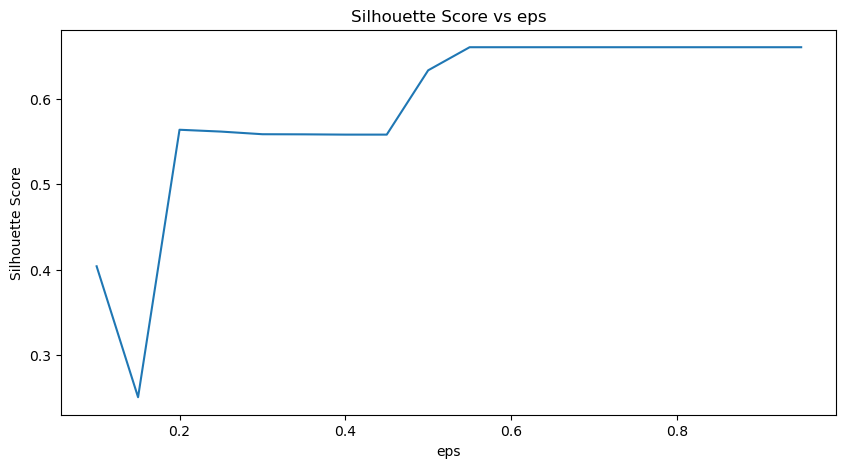

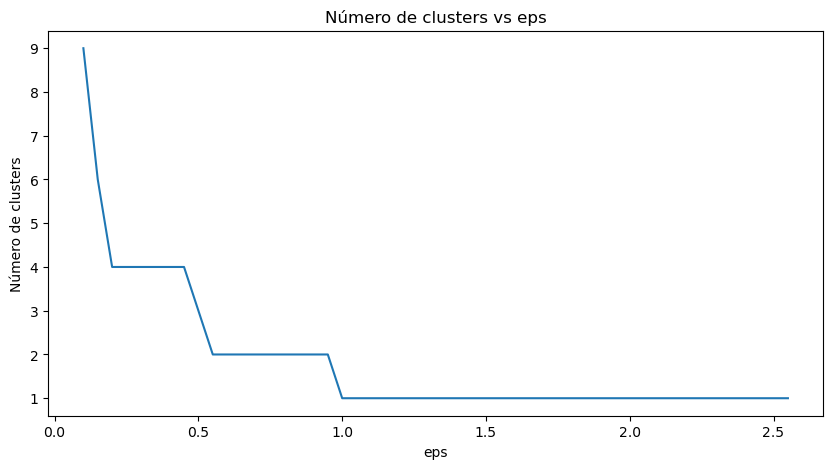

In [12]:
import matplotlib.pyplot as plt

# Gráfica de silhouette vs eps
plt.figure(figsize=(10,5))
plt.plot(resultados_df['eps'], resultados_df['silhouette'])
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs eps')
plt.show()

# Gráfica de número de clusters vs eps
plt.figure(figsize=(10,5))
plt.plot(resultados_df['eps'], resultados_df['numero_clusters'])
plt.xlabel('eps')
plt.ylabel('Número de clusters')
plt.title('Número de clusters vs eps')
plt.show()

In [14]:
mejor = resultados_df.loc[resultados_df['silhouette'].idxmax()]
print(f"Mejor eps: {mejor['eps']}, Silhouette: {mejor['silhouette']}, Clusters: {mejor['numero_clusters']}, Outliers: {mejor['total_outliers']}")

Mejor eps: 0.5500000000000002, Silhouette: 0.660869660680486, Clusters: 2.0, Outliers: 0.0


In [16]:
eps = 0.55
min_samples = 14

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

df_final_clustering['cluster'] = clusters

print(f"Clusters encontrados: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Puntos ruido: {list(clusters).count(-1)}")

mask = clusters != -1
if np.sum(mask) > 1:
    score = silhouette_score(X_scaled[mask], clusters[mask])
    print(f"Silhouette Score: {score:.3f}")


Clusters encontrados: 2
Puntos ruido: 0
Silhouette Score: 0.661


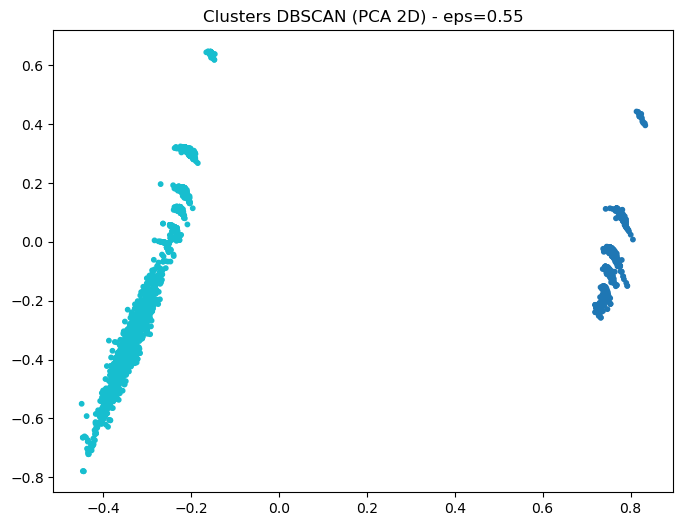

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', s=10)
plt.title('Clusters DBSCAN (PCA 2D) - eps=0.55')
plt.show()

In [25]:
for c in sorted(df_final_clustering['cluster'].unique()):
    print(f"\nCluster {c}:")
    display(df_final_clustering[df_final_clustering['cluster'] == c].describe())


Cluster 0:


,funcion,estudios,experiencia,ubicacion,skills,tecnologias_aptitudes,idiomas,vacaciones,beneficios,portal_empleo,...,modalidad_Presencial,modalidad_Remoto,jornada_Jornada completa,jornada_Media jornada,jornada_Por horas,contrato_Indefinido,contrato_Otros,contrato_Prácticas,contrato_Temporal,cluster
count,1356.000000,1356.0,1356.000000,1356.000000,1356.0,1356.000000,1356.000000,1356.000000,1356.0,1356.0,...,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.00000,1356.000000,1356.000000,1356.000000,1356.0
mean,39904.378721,1.0,2.830383,0.003687,0.0,4.629794,0.627581,24.352655,0.0,0.0,...,0.406342,0.295723,0.984513,0.011062,0.004425,0.90118,0.068584,0.016962,0.013274,0.0
std,7948.882788,0.0,1.478378,0.060634,0.0,3.079770,0.483627,1.507032,0.0,0.0,...,0.491331,0.456535,0.123524,0.104631,0.066396,0.29853,0.252839,0.129175,0.114489,0.0
min,16500.000000,1.0,0.000000,0.000000,0.0,1.000000,0.000000,22.600000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,34858.208955,1.0,2.000000,0.000000,0.0,2.000000,0.000000,23.200000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.0
50%,38736.111111,1.0,3.000000,0.000000,0.0,4.000000,1.000000,23.800000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.0
75%,43729.166667,1.0,3.000000,0.000000,0.0,6.000000,1.000000,25.600000,0.0,0.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.0
max,66041.666667,1.0,10.000000,1.000000,0.0,25.000000,1.000000,28.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0



Cluster 1:


,funcion,estudios,experiencia,ubicacion,skills,tecnologias_aptitudes,idiomas,vacaciones,beneficios,portal_empleo,...,modalidad_Presencial,modalidad_Remoto,jornada_Jornada completa,jornada_Media jornada,jornada_Por horas,contrato_Indefinido,contrato_Otros,contrato_Prácticas,contrato_Temporal,cluster
count,4003.000000,4003.0,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,...,4003.000000,4003.000000,4003.0,4003.0,4003.0,4003.000000,4003.000000,4003.000000,4003.000000,4003.0
mean,42656.225860,0.0,2.191731,0.090432,2.016737,3.372970,0.920310,23.777967,1.709968,0.334000,...,0.386710,0.365976,1.0,0.0,0.0,0.990257,0.003997,0.002748,0.002998,1.0
std,6216.258711,0.0,2.021628,0.286836,3.243564,2.166493,0.270847,1.540733,3.139131,0.471698,...,0.487057,0.481763,0.0,0.0,0.0,0.098235,0.063103,0.052355,0.054676,0.0
min,16500.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,39703.672870,0.0,0.000000,0.000000,0.000000,2.000000,1.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
50%,43093.750000,0.0,3.000000,0.000000,0.000000,3.000000,1.000000,23.200000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
75%,43854.687500,0.0,3.000000,0.000000,5.000000,5.000000,1.000000,24.000000,3.000000,1.000000,...,1.000000,1.000000,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
max,66041.666667,0.0,10.000000,1.000000,19.000000,14.000000,1.000000,40.000000,17.000000,1.000000,...,1.000000,1.000000,1.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.0


**VAMOS A ANALIZAR LOS CLUSTERS**

In [27]:
import pandas as pd

# 1. Cantidad de elementos por cluster
print("Cantidad de elementos por cluster:")
print(df_final_clustering['cluster'].value_counts())

Cantidad de elementos por cluster:
cluster
1    4003
0    1356
Name: count, dtype: int64


In [29]:
# 2. Estadísticas descriptivas por cluster
print("\nEstadísticas descriptivas por cluster:")
stats_clusters = df_final_clustering.groupby('cluster').describe().transpose()
display(stats_clusters)


Estadísticas descriptivas por cluster:


cluster                             0             1
funcion           count   1356.000000   4003.000000
                  mean   39904.378721  42656.225860
                  std     7948.882788   6216.258711
                  min    16500.000000  16500.000000
                  25%    34858.208955  39703.672870
...                               ...           ...
contrato_Temporal min        0.000000      0.000000
                  25%        0.000000      0.000000
                  50%        0.000000      0.000000
                  75%        0.000000      0.000000
                  max        1.000000      1.000000

[168 rows x 2 columns]

In [31]:
# 3. Medias por cluster (más fácil para interpretar)
print("\nMedias de variables por cluster:")
medias = df_final_clustering.groupby('cluster').mean()
display(medias)


Medias de variables por cluster:


,funcion,estudios,experiencia,ubicacion,skills,tecnologias_aptitudes,idiomas,vacaciones,beneficios,portal_empleo,...,modalidad_Híbrido,modalidad_Presencial,modalidad_Remoto,jornada_Jornada completa,jornada_Media jornada,jornada_Por horas,contrato_Indefinido,contrato_Otros,contrato_Prácticas,contrato_Temporal
cluster,,,,,,,,,,,,,,,,,,,,,
0,39904.378721,1.0,2.830383,0.003687,0.000000,4.629794,0.627581,24.352655,0.000000,0.000,...,0.297935,0.406342,0.295723,0.984513,0.011062,0.004425,0.901180,0.068584,0.016962,0.013274
1,42656.225860,0.0,2.191731,0.090432,2.016737,3.372970,0.920310,23.777967,1.709968,0.334,...,0.247315,0.386710,0.365976,1.000000,0.000000,0.000000,0.990257,0.003997,0.002748,0.002998


In [33]:
# 4. Tamaño de cada cluster y proporción respecto al total
total = len(df_final_clustering)
sizes = df_final_clustering['cluster'].value_counts()
proporciones = sizes / total * 100
print("\nTamaño y proporción de cada cluster (%):")
print(pd.DataFrame({'Tamaño': sizes, 'Proporción (%)': proporciones.round(2)}))


Tamaño y proporción de cada cluster (%):
         Tamaño  Proporción (%)
cluster                        
1          4003            74.7
0          1356            25.3


**y aquí el tamaño de cada cluster y el porcentaje en proporcion**

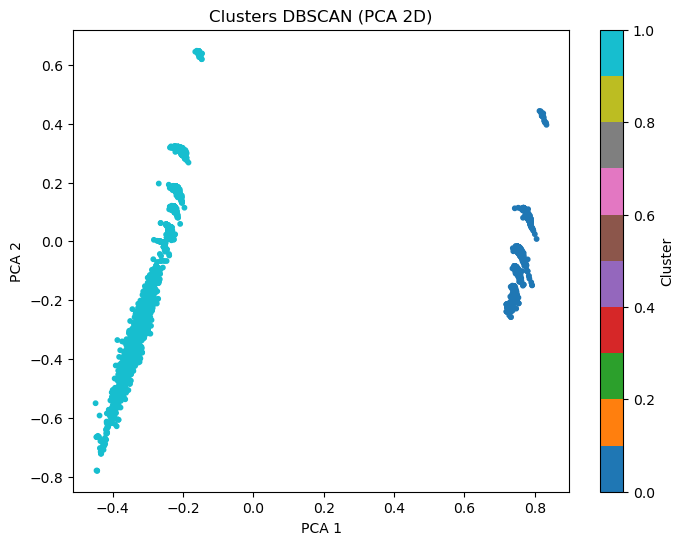

In [35]:
# 5. Visualización PCA con clusters (si no la tienes ya)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_final_clustering['cluster'], cmap='tab10', s=10)
plt.title('Clusters DBSCAN (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

**vemos que los clusters están bien diferenciados visualmente, lo que confirma la validez del clustering del análisis**

In [45]:
df_subconjunto = df_final_clustering[['estudios', 'experiencia', 'skills', 'tecnologias_aptitudes', 'vacaciones', 'beneficios', 'salario_medio']].copy()

In [49]:
df_subconjunto['cluster'] = clusters

In [53]:
df_subconjunto

,estudios,experiencia,skills,tecnologias_aptitudes,vacaciones,beneficios,salario_medio,cluster
0,1,3.0,0,8,25.6,0,37800.0,0
1,1,2.0,0,8,23.2,0,30000.0,0
2,1,3.0,0,11,23.2,0,39900.0,0
3,1,5.0,0,11,25.6,0,41100.0,0
4,1,2.0,0,10,25.6,0,30000.0,0
...,...,...,...,...,...,...,...,...
5354,0,0.0,0,0,24.0,0,45000.0,1
5355,0,0.0,0,0,28.0,0,45000.0,1
5356,0,0.0,0,0,22.0,0,55000.0,1
5357,0,0.0,5,5,22.0,7,42500.0,1


In [51]:
df_subconjunto.to_csv("df_subconjunto_cluster.csv", index=False)

**HASTA AQUÍ EL CLUSTERING**

Implementación en el modelo Entidad-Relación
Para añadir esta información al modelo ER de SQL:

In [ ]:
#1. Añadir columna cluster a la tabla de ofertas de empleo:
#ALTER TABLE ofertas_empleo ADD COLUMN cluster INT;

In [ ]:
#2. Actualizar los valores de cluster:
#UPDATE ofertas_empleo SET cluster = [valor_cluster] WHERE id = [id_oferta];

In [ ]:
#3. Opcionalmente, crear una tabla de descripción de clusters:
#CREATE TABLE clusters_descripcion (
  #cluster_id INT PRIMARY KEY,
  #descripcion VARCHAR(255),
  #experiencia_media FLOAT,
  #salario_medio FLOAT
#);

**ANÁLISIS DEL CLUSTERING**

In [35]:
#AQUI MIRAMOS EL TAMAÑO Y LA PROPORCIÓN EN PORCENTAJE

sizes = df_final_clustering['cluster'].value_counts()
proporciones = (sizes / len(df_final_clustering) * 100).round(2)
print(pd.DataFrame({'Tamaño': sizes, 'Proporción (%)': proporciones}))

         Tamaño  Proporción (%)
cluster                        
1          4003            74.7
0          1356            25.3


In [33]:
#AQUI MIRAMOS LAS MEDIAS DEL CLUSTER EN CADA PARÁMETRO DE NUESTRO DATAFRAME

medias = df_final_clustering.groupby('cluster').mean()
print(medias)

              funcion  estudios  experiencia  ubicacion    skills  \
cluster                                                             
0        39904.378721       1.0     2.830383   0.003687  0.000000   
1        42656.225860       0.0     2.191731   0.090432  2.016737   

         tecnologias_aptitudes   idiomas  vacaciones  beneficios  \
cluster                                                            
0                     4.629794  0.627581   24.352655    0.000000   
1                     3.372970  0.920310   23.777967    1.709968   

         portal_empleo  ...  modalidad_Híbrido  modalidad_Presencial  \
cluster                 ...                                            
0                0.000  ...           0.297935              0.406342   
1                0.334  ...           0.247315              0.386710   

         modalidad_Remoto  jornada_Jornada completa  jornada_Media jornada  \
cluster                                                                      
0    

**Características de los Clusters**

**Cluster 0** (25.3% - 1356 ofertas):

- Requiere estudios formales (valor 1.0)

- Mayor experiencia (2.83 años)

- Más vacaciones (24.35 días)

- Menos skills específicas (0.0) aunque si piden ciertas tecnologías y aptitudes (4.62)

- Pertenece todo a tecnoempleo (0.0)

- Sin beneficios adicionales (0.0)

- Menor porcentaje de contratos indefinidos que en el cluster 1 (90.1%)

- Permite jornadas parciales en algunos casos

**Cluster 1** (74.7% - 4003 ofertas):

- No requiere estudios formales específicos (0.0)

- Menor experiencia (2.19 años)

- Más skills técnicas y tecnologías o aptitudes (2.02 y 3.37)

- Ofrece beneficios adicionales (1.71)

- Pertenece a ambos portales de empleo (manfred y tecnoempleo) (0.33)

- 100% jornada completa

- Mayor porcentaje de contratos indefinidos (99%)

- Mayor proporción de trabajo remoto (36.6% vs 29.6%)

**Interpretación del Mercado Laboral**

La visualización PCA muestra dos grupos claramente separados:

- **Cluster 0:** Representa ofertas más tradicionales/académicas que valoran la formación formal y la experiencia por encima de aptitudes o skills específicas.

- **Cluster 1:** Representa ofertas más orientadas a habilidades que no necesitan estudios formales pero buscan competencias específicas, y ofrecen mejores condiciones como un contrato indefinido o jornada completa, en resumen mayor estabilidad, beneficios o mayor flexibilidad (remoto).

Esta segmentación puede ser muy útil para orientar la búsqueda de empleo según el perfil del candidato.